<a href="https://colab.research.google.com/github/avinashdhakne/Covi-Bot-A-intent-based-Covid-19-information-chatbot/blob/main/Comparative_Prediction_Of_AIQ_MLmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("city_day.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
data1 = data.loc[data['City'] == "Delhi"]
data1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [4]:
data1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       2007 non-null   float64
 3   PM10        1932 non-null   float64
 4   NO          2007 non-null   float64
 5   NO2         2007 non-null   float64
 6   NOx         2009 non-null   float64
 7   NH3         2000 non-null   float64
 8   CO          2009 non-null   float64
 9   SO2         1899 non-null   float64
 10  O3          1925 non-null   float64
 11  Benzene     2009 non-null   float64
 12  Toluene     2009 non-null   float64
 13  Xylene      1228 non-null   float64
 14  AQI         1999 non-null   float64
 15  AQI_Bucket  1999 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


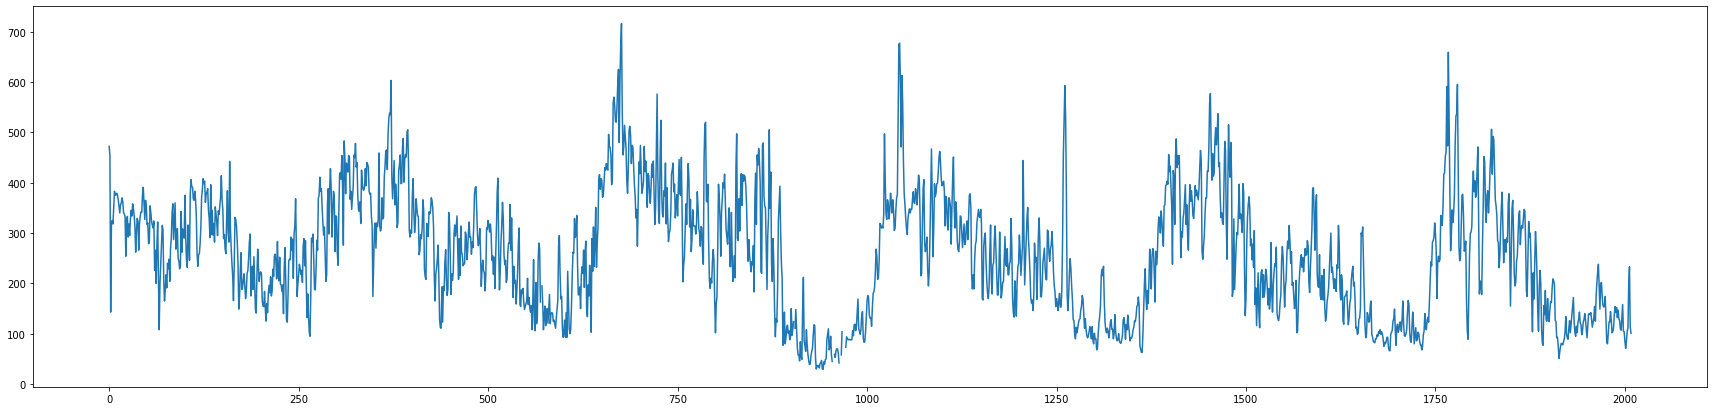

In [6]:
x_array = np.array(data1["AQI"]).reshape(-1,1)
plt.figure(figsize=(30,7))
plt.plot(x_array)

In [7]:
for count,i in enumerate(np.isnan(x_array)):
  if i ==True:
    print("At Index" , count,"Null value")
print("Length of array: ",len(x_array))

At Index 570 Null value
At Index 904 Null value
At Index 955 Null value
At Index 956 Null value
At Index 964 Null value
At Index 965 Null value
At Index 968 Null value
At Index 969 Null value
At Index 970 Null value
At Index 971 Null value
Length of array:  2009


In [8]:
clean_array = np.array(x_array[np.logical_not(np.isnan(x_array))]).reshape(-1,1)
len(clean_array)

1999

In [9]:
pred_days = 7
x_data = clean_array[:-pred_days].reshape(-1,1)
y_data = clean_array[pred_days:].reshape(-1,1)
len(x_data)

1992

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=pred_days, shuffle=False)

# **Linear Regression**

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression().fit(x_train,y_train)
lr_pred = lr.predict(x_test)

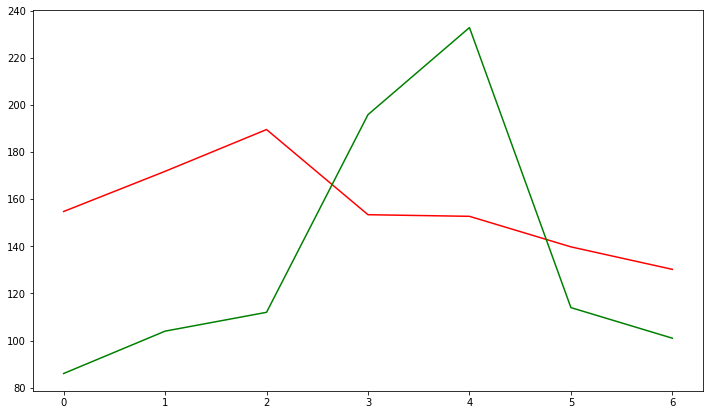

In [13]:
plt.figure(figsize=(12,7))
plt.plot(lr_pred, color = "Red")
plt.plot(y_test, color="Green")

In [14]:
lr_score = r2_score(y_test,lr_pred)
lr_score

-0.33676991866686223

# **Polynomial Regression**

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
pr = PolynomialFeatures(degree = 10)
x_poly = pr.fit_transform(x_train)

lr2 = LinearRegression().fit(x_poly, y_train)
pr_pred = lr2.predict(pr.fit_transform(x_test))

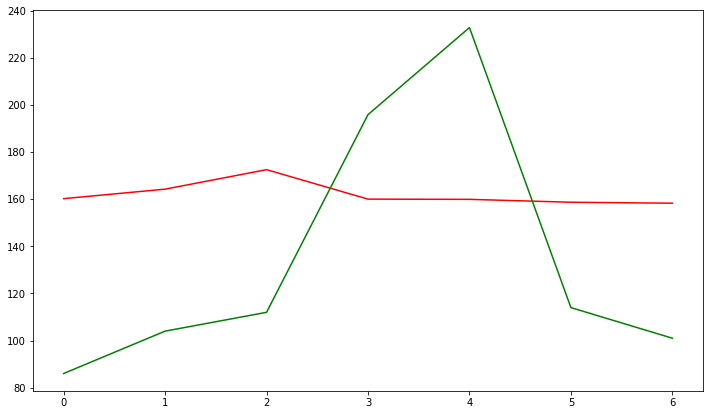

In [17]:
plt.figure(figsize=(12,7))
plt.plot(pr_pred, color="red")
plt.plot(y_test, color="Green")

In [18]:
pr_score = r2_score(y_test,pr_pred)
pr_score

-0.31555998387355944

# **Decision Tree**

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
tree_pred = tree.predict(x_test)

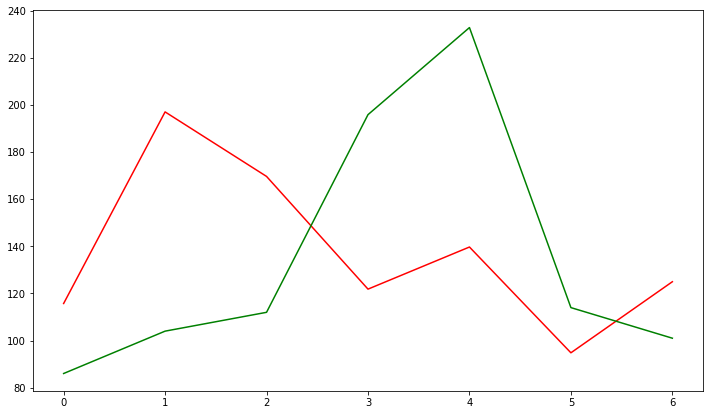

In [21]:
plt.figure(figsize=(12,7))
plt.plot(tree_pred, color="red")
plt.plot(y_test, color="Green")

In [22]:
tree_score = r2_score(y_test,tree_pred)
tree_score

-0.49033814110097396

# **Random forest regressor**

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
forest = RandomForestRegressor().fit(x_train, y_train)
forest_pred = forest.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


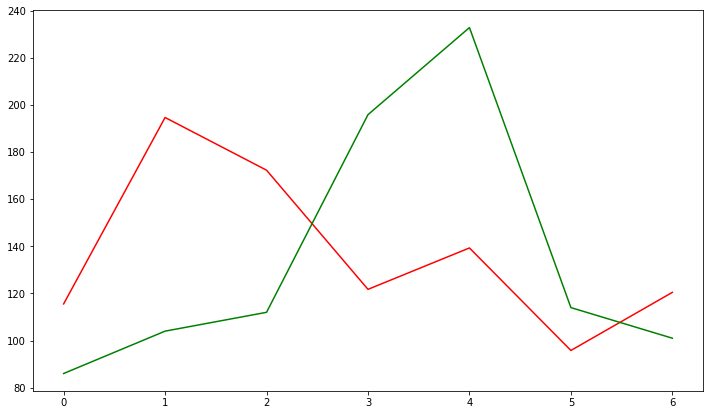

In [25]:
plt.figure(figsize=(12,7))
plt.plot(forest_pred, color="red")
plt.plot(y_test, color="Green")

In [26]:
forest_score = r2_score(y_test,forest_pred)
forest_score

-0.4754482988341304

# **Support Vector regressor**

In [27]:
from sklearn.svm import SVR

In [28]:
svr = SVR().fit(x_train, y_train)
svr_pred = svr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


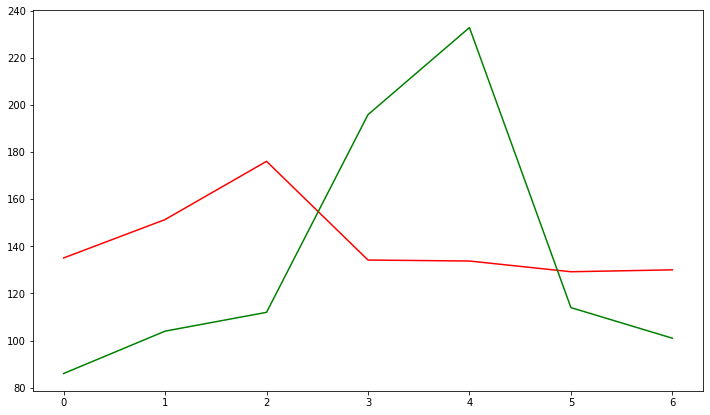

In [29]:
plt.figure(figsize=(12,7))
plt.plot(svr_pred, color="red")
plt.plot(y_test, color="Green")

In [30]:
svm_score = r2_score(y_test,svr_pred)
svm_score

-0.24967581454827648

# **Conclusion**

In [31]:
scores = {"linear_regression":lr_score, "ploynomial regression": pr_score, "decision tree": tree_score, "Random forest": forest_score, "Support Vector Regressor": svm_score}
models = list(scores.keys())
score = list(scores.values())

Text(0.5, 1.0, 'Prediction scores for 7 days')

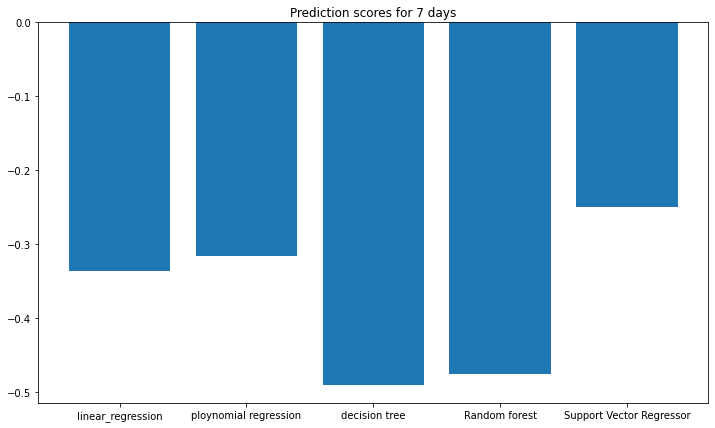

In [32]:
plt.figure(figsize=(12,7))
plt.bar(models, score)
plt.title(f"Prediction scores for {pred_days} days")